In [1]:
!conda env list

# conda environments:
#
base                     /home/team_04/anaconda3
tf2.1                    /home/team_04/anaconda3/envs/tf2.1
tf2_torch             *  /home/team_04/anaconda3/envs/tf2_torch



In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
!ls data -R

data:
final_data

data/final_data:
sensor_test_final.csv  sensor_train_final.csv  submit_example.csv


In [4]:
test=pd.read_csv('data/final_data/sensor_test_final.csv')
train=pd.read_csv('data/final_data/sensor_train_final.csv')
train.head(5)

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
0,0,37,-0.1,0.0,-0.1,-0.49,1.31,9.51,11
1,0,123,0.0,0.0,-0.1,-0.49,1.31,9.51,11
2,0,210,0.0,-0.0,0.1,-0.41,1.29,9.58,11
3,0,291,0.0,0.0,0.0,-0.38,1.32,9.52,11
4,0,375,0.1,0.0,0.1,-0.31,1.29,9.58,11


In [5]:
mapping = {
    0: 'A_1', 1: 'B_2', 2: 'A_3', 3: 'A_4', 4: 'B_3', 5: 'C_5', 6: 'C_2', 7: 'A_5', 8: 'B_1', 
    9: 'C_1', 10: 'A_2', 11: 'C_3',12: 'B_5', 13: 'B_4', 14: 'C_4', 
    15: 'D_6', 16: 'E_7', 17: 'F_8', 18: 'G_9', 19: 'H_0'
          }

In [6]:
train.columns

Index(['fragment_id', 'time_point', 'acc_x', 'acc_y', 'acc_z', 'acc_xg',
       'acc_yg', 'acc_zg', 'behavior_id'],
      dtype='object')

In [25]:
len(set(train['fragment_id']))

15000

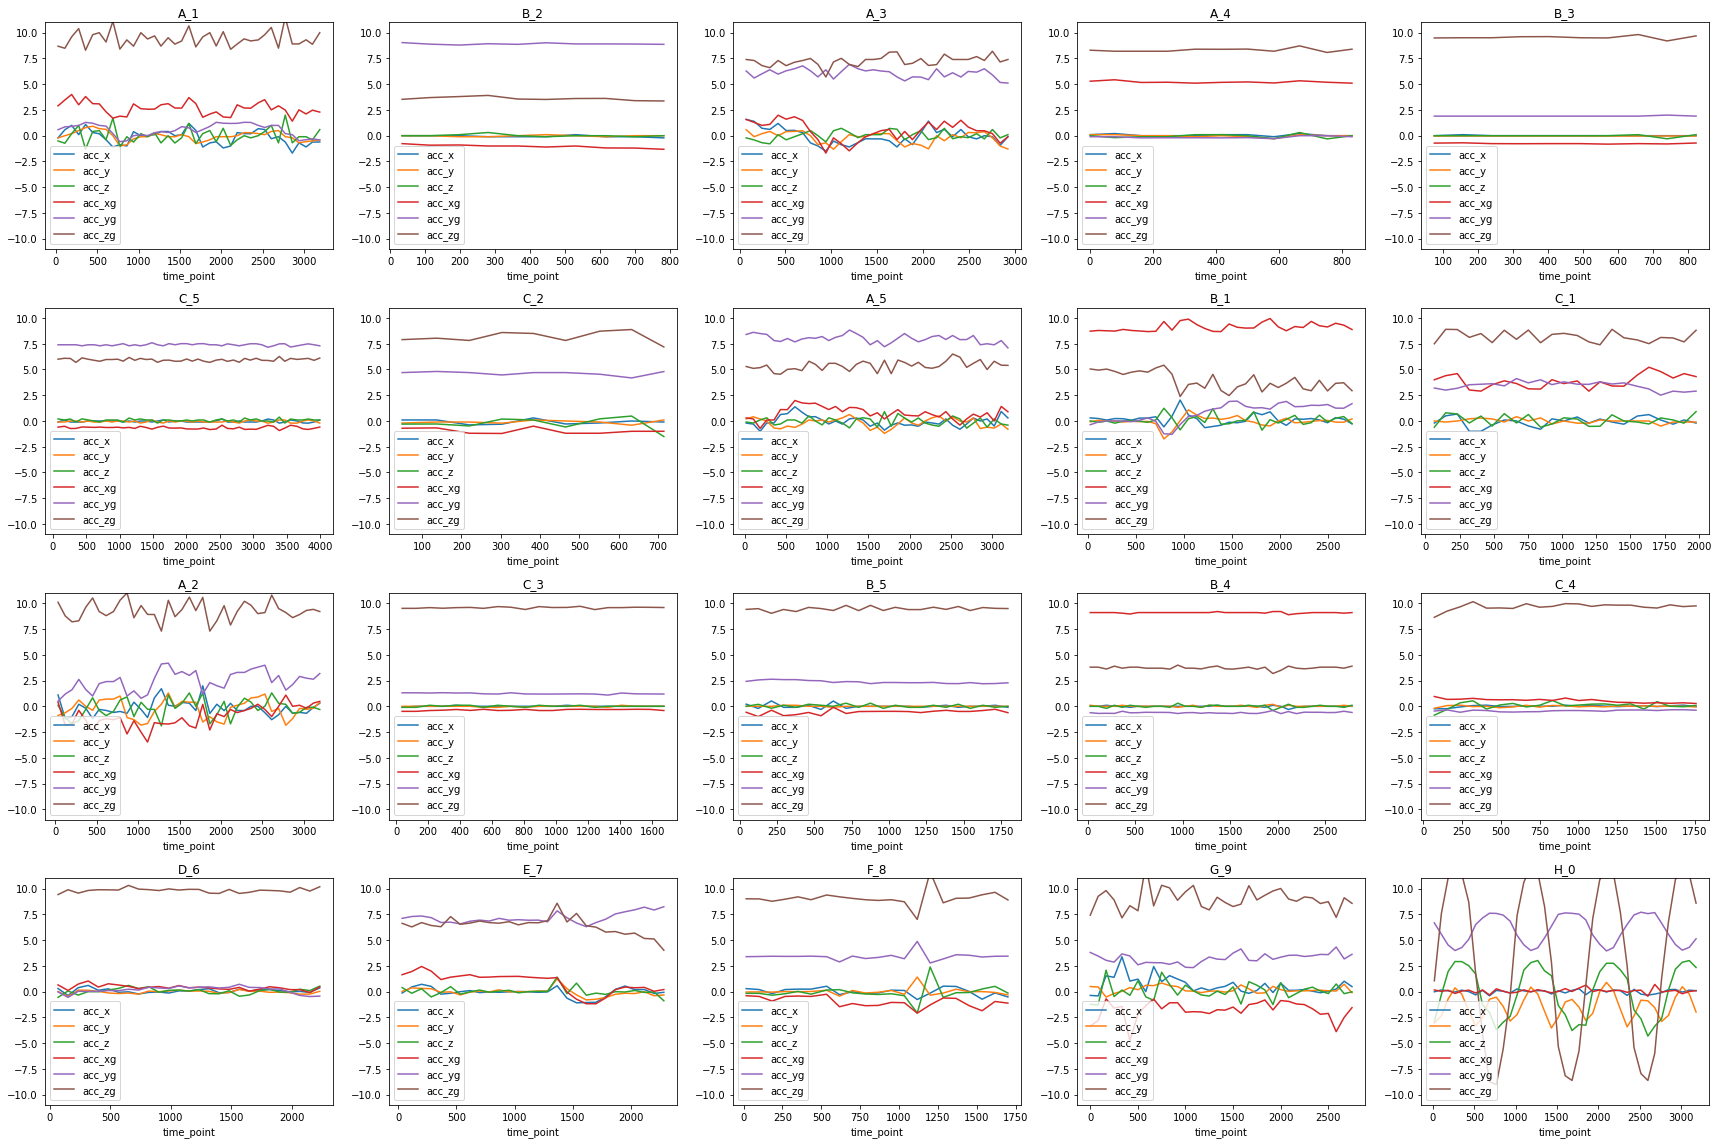

In [13]:
plt.figure(figsize=(24,16))
plot_feat=['acc_x', 'acc_y', 'acc_z', 'acc_xg','acc_yg', 'acc_zg']  
for i in range(20):
    plt.subplot(4,5,i+1)
    tmp=train[['fragment_id','behavior_id']].drop_duplicates()
    now_id=tmp[tmp['behavior_id']==i]['fragment_id'].values[0]
    for j in range(len(plot_feat)):
        sns.lineplot(train[train['fragment_id']==now_id]['time_point'],train[train['fragment_id']==now_id][plot_feat[j]],\
                     label=plot_feat[j])
        plt.ylim(-11,11)
    
    plt.title(mapping[i])
    plt.legend(loc='lower left')
    plt.ylabel('')
plt.tight_layout()
plt.show()

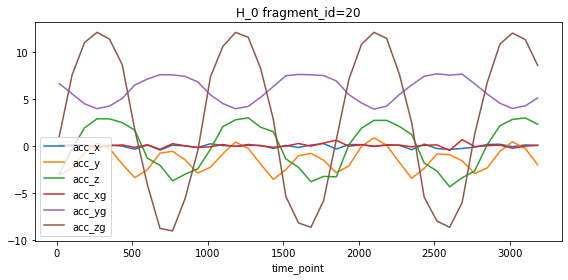

In [33]:
plt.figure(figsize=(8,4))
plot_feat=['acc_x', 'acc_y', 'acc_z', 'acc_xg','acc_yg', 'acc_zg']  

for j in range(len(plot_feat)):
    sns.lineplot(train[train['fragment_id']==now_id]['time_point'],train[train['fragment_id']==now_id][plot_feat[j]],\
                 label=plot_feat[j])
# plt.ylim(-11,11)
    
plt.title(mapping[i]+' fragment_id='+str(now_id))
plt.legend(loc='lower left')
plt.ylabel('')
plt.tight_layout()
plt.show()

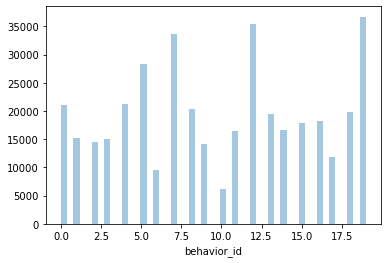

In [6]:
# 不同label的数量
sns.distplot(train['behavior_id'],kde=False)

fragment_id
0        20
1        22
2        39
3        28
4        10
         ..
14995    16
14996     9
14997    15
14998    24
14999    39
Length: 15000, dtype: int64

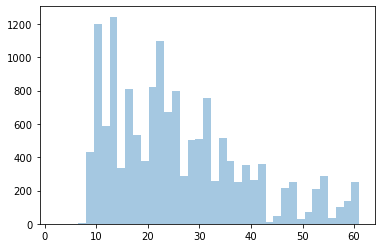

In [7]:
# 训练集中数据长度
sns.distplot(train.groupby(['fragment_id']).apply(lambda x:len(x)),kde=False)
train.groupby(['fragment_id']).apply(lambda x:len(x))

fragment_id
0        24
1        32
2        60
3        36
4        24
         ..
15995    42
15996    52
15997    33
15998    12
15999    28
Length: 16000, dtype: int64

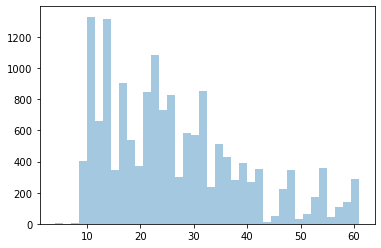

In [8]:
# 测试集中数据长度
sns.distplot(test.groupby(['fragment_id']).apply(lambda x:len(x)),kde=False)
test.groupby(['fragment_id']).apply(lambda x:len(x))

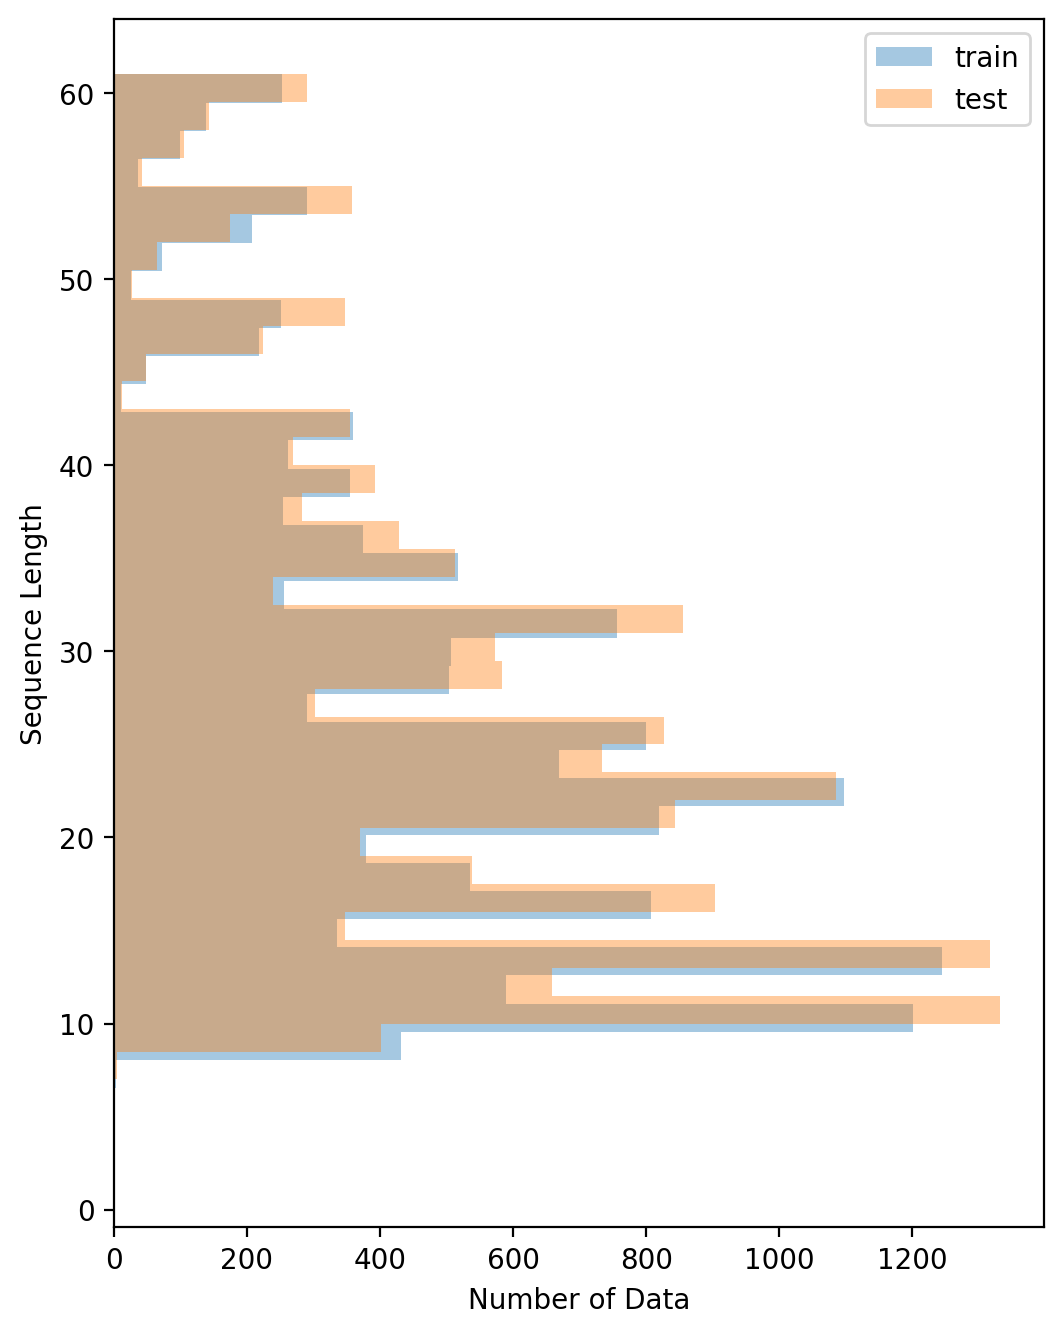

In [23]:
# 放在一起看数据长度的比例
plt.figure(figsize=(6,8),dpi=200)
sns.distplot(train.groupby(['fragment_id']).apply(lambda x:len(x)),kde=False,label='train',vertical=True)
sns.distplot(test.groupby(['fragment_id']).apply(lambda x:len(x)),kde=False,label='test',vertical=True)
plt.ylabel('Sequence Length')
plt.xlabel('Number of Data')
plt.legend()


label and 长度

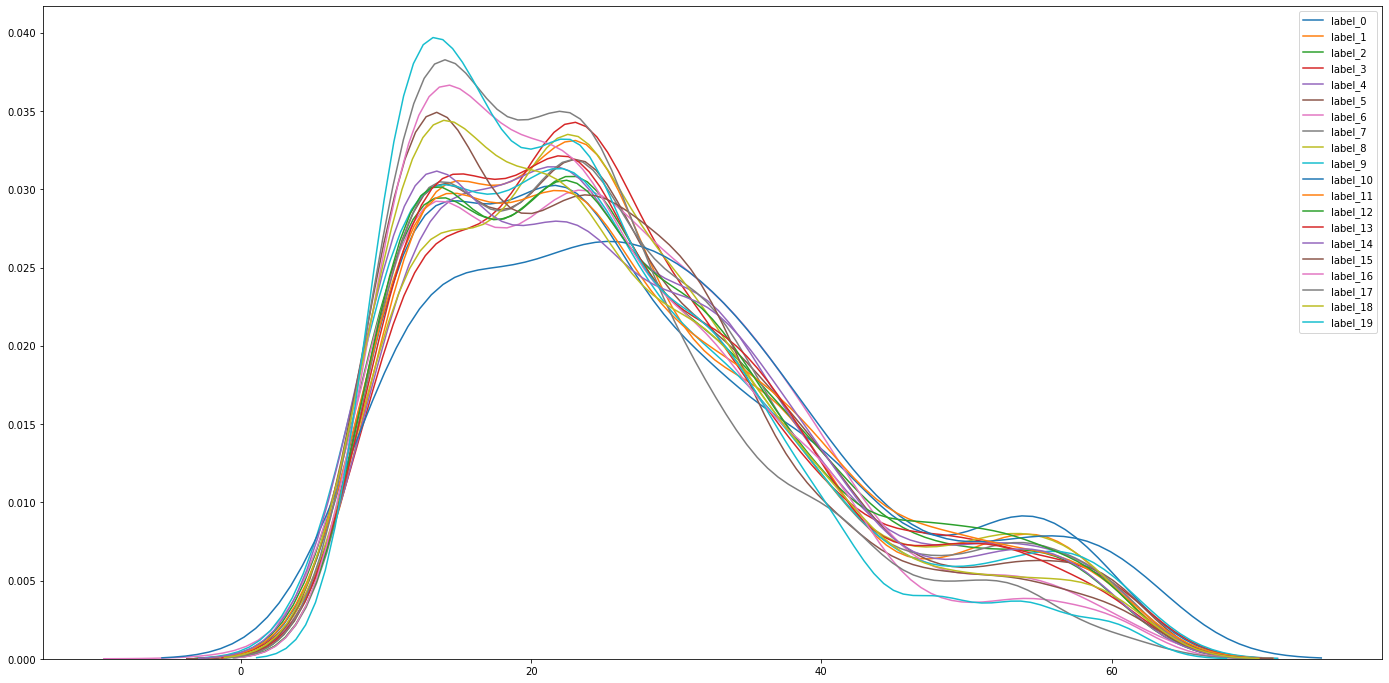

In [53]:
plt.figure(figsize=(24,12))
for i in range(20):
    tmp=train[train['behavior_id']==i]
    sns.distplot(tmp.groupby(['fragment_id']).apply(lambda x:len(x)),kde=True,label='label_'+str(i),hist=False)
#     plt.title('label_'+str(i))
#     plt.show()

In [11]:
train.columns

Index(['fragment_id', 'time_point', 'acc_x', 'acc_y', 'acc_z', 'acc_xg',
       'acc_yg', 'acc_zg', 'behavior_id'],
      dtype='object')

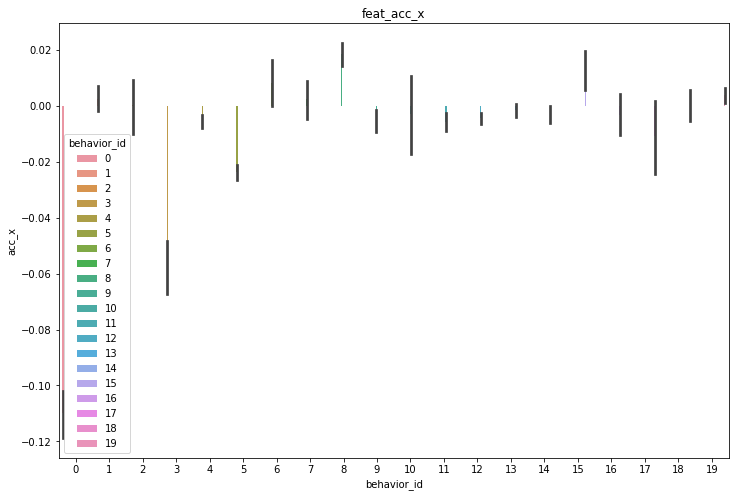

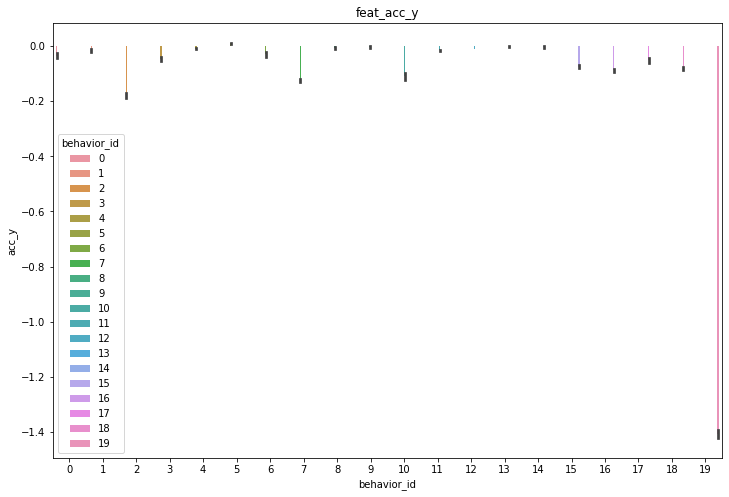

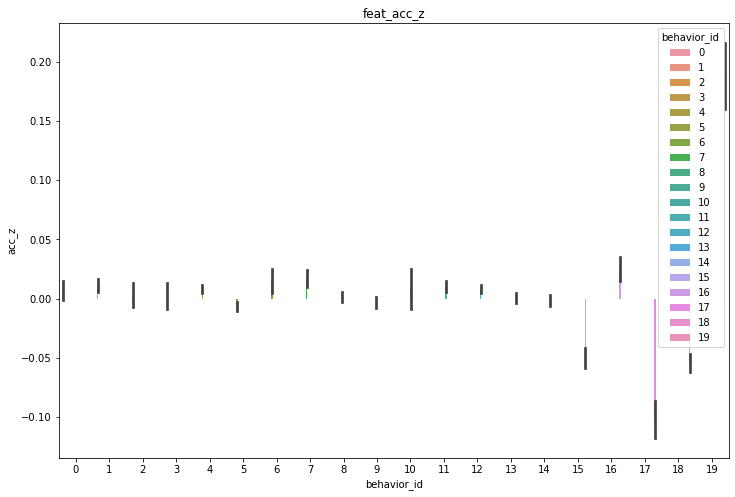

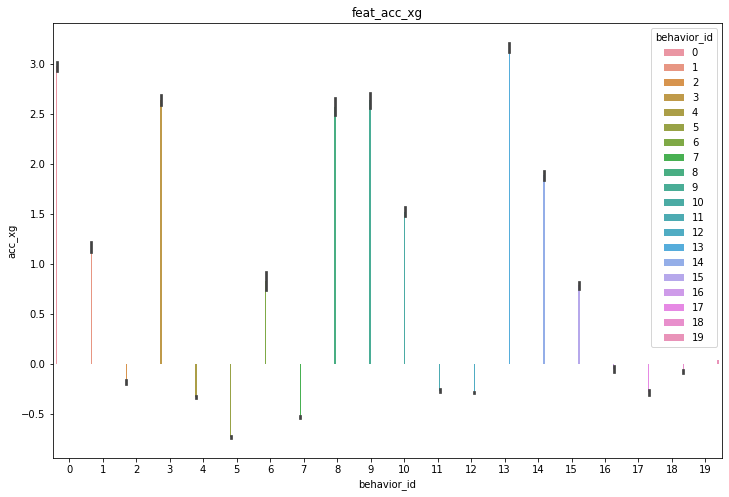

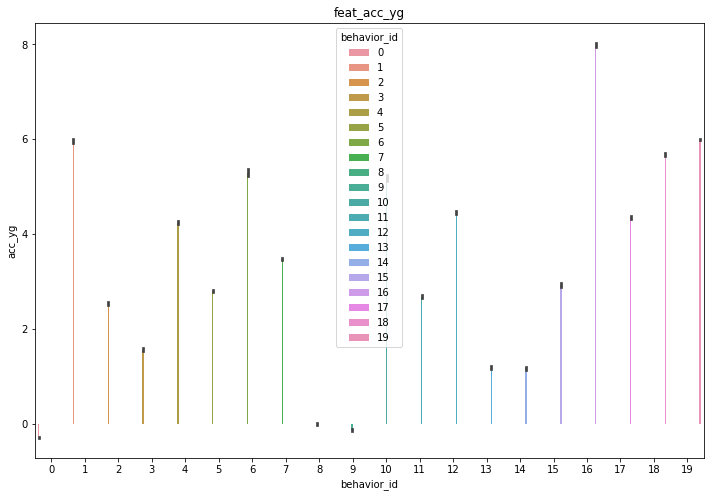

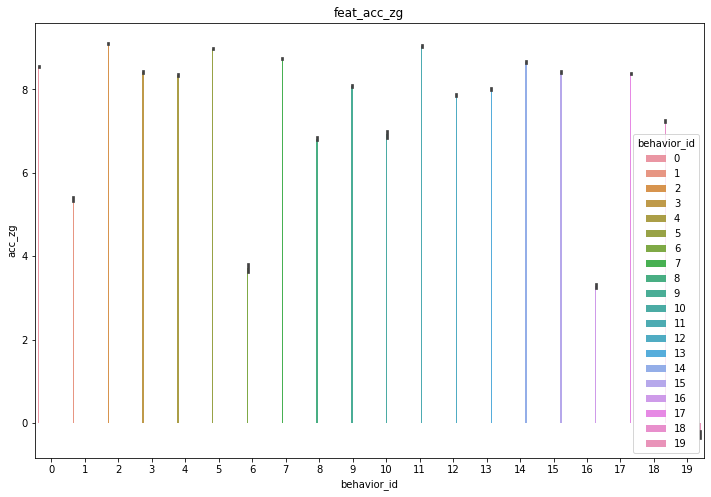

In [12]:
# seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,\
#                 estimator=<function mean>,ci=95, n_boot=1000, units=None, orient=None,\
#                 color=None, palette=None, saturation=0.75,\
#                 errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

analy_feat=['acc_x', 'acc_y', 'acc_z', 'acc_xg','acc_yg', 'acc_zg']

for i in analy_feat:
    plt.figure(figsize=(12,8))
    sns.barplot(data=train,x='behavior_id',y=i,hue='behavior_id')
    plt.title('feature_'+i)
    plt.show()

# 时间间隔

In [13]:
train.sample(4)

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
258486,9868,1697,-0.39,0.62,-0.19,6.61,-0.19,6.81,0
178222,6797,1226,-0.10,-0.10,0.00,0.00,6.40,7.02,12
191434,7310,505,0.10,-0.10,-0.30,-1.29,-0.20,9.30,9
190487,7273,619,0.00,-0.10,0.20,1.10,6.80,6.40,14


In [14]:
train['timegap']=train.groupby(['fragment_id'])['time_point'].diff()
test['timegap']=test.groupby(['fragment_id'])['time_point'].diff()

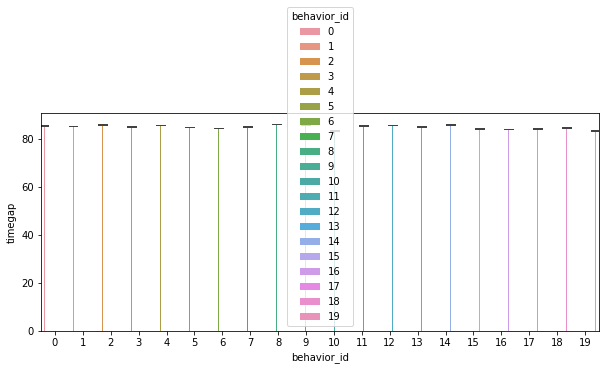

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(data=train,x='behavior_id',y='timegap',hue='behavior_id',errwidth=1,ci=100,capsize=.3)

In [16]:
train.columns

Index(['fragment_id', 'time_point', 'acc_x', 'acc_y', 'acc_z', 'acc_xg',
       'acc_yg', 'acc_zg', 'behavior_id', 'timegap'],
      dtype='object')

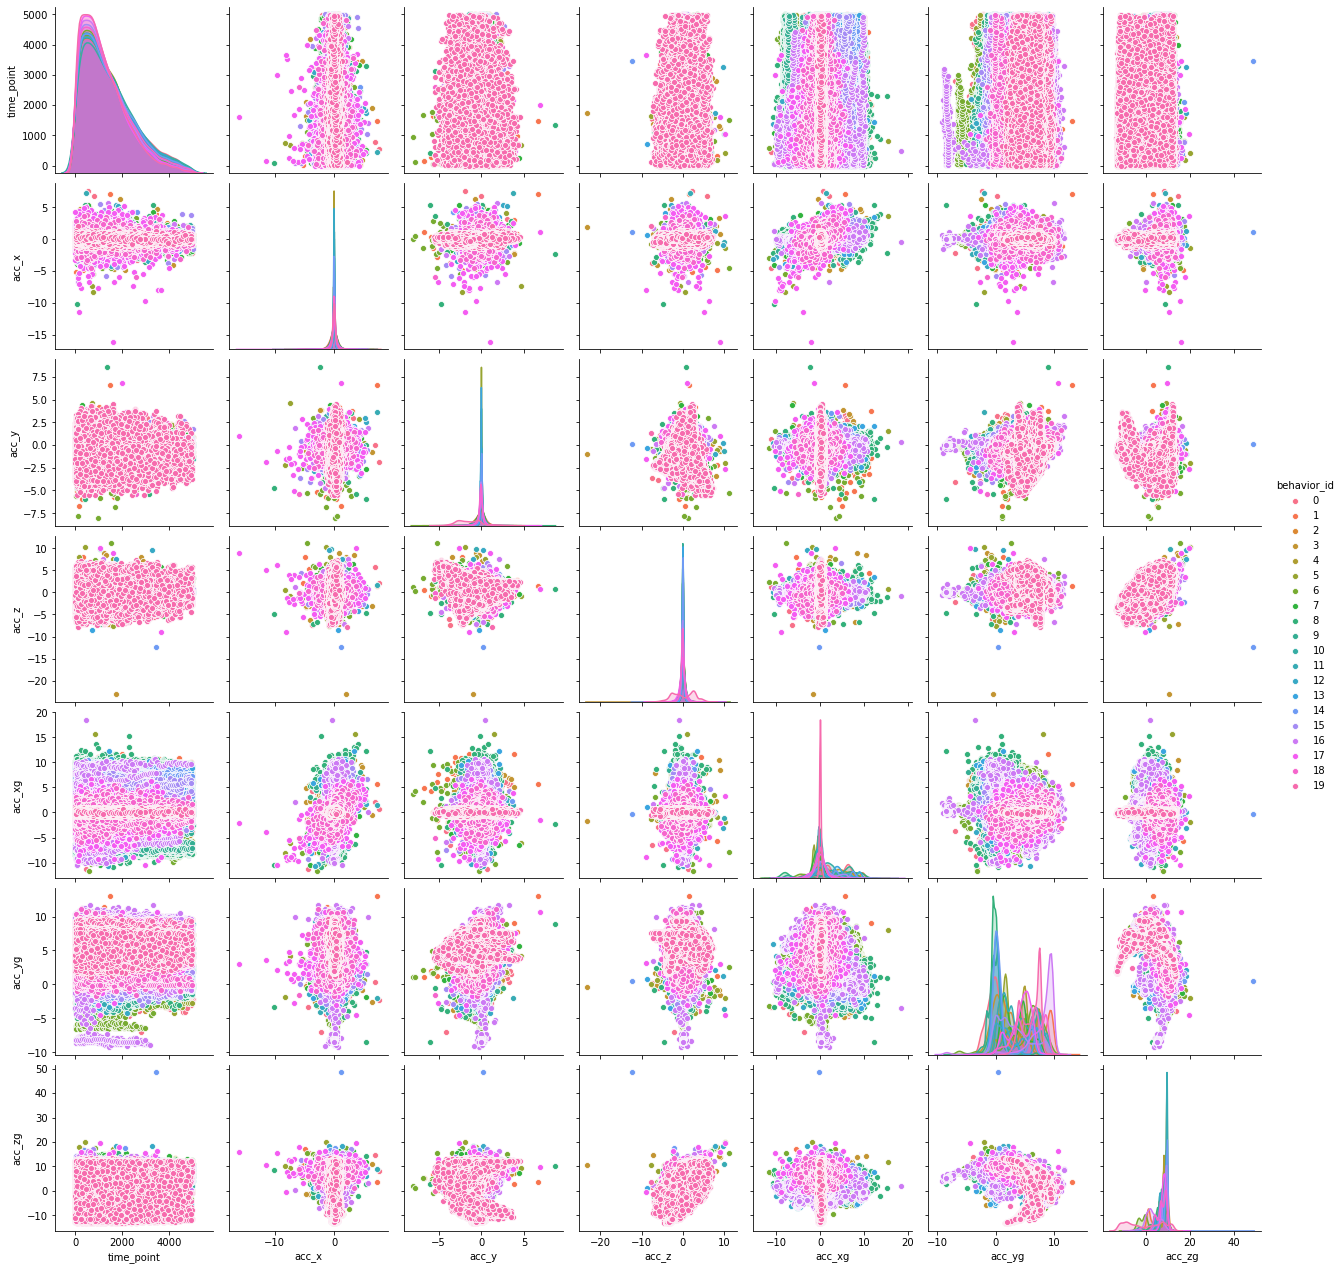

In [73]:
# iris = sns.load_dataset('iris')
sns.pairplot(train[['time_point', 'acc_x', 'acc_y', 'acc_z', 'acc_xg','acc_yg', 'acc_zg', 'behavior_id']],hue='behavior_id')

In [55]:
train.iloc[:10,:]

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id,timegap
0,0,37,-0.1,0.0,-0.1,-0.49,1.31,9.51,11,NaN
1,0,123,0.0,0.0,-0.1,-0.49,1.31,9.51,11,86.0
2,0,210,0.0,-0.0,0.1,-0.41,1.29,9.58,11,87.0
3,0,291,0.0,0.0,0.0,-0.38,1.32,9.52,11,81.0
4,0,375,0.1,0.0,0.1,-0.31,1.29,9.58,11,84.0
5,0,463,0.0,0.0,0.1,-0.40,1.30,9.60,11,88.0
6,0,545,0.0,-0.1,-0.1,-0.29,1.21,9.51,11,82.0
7,0,635,-0.0,-0.1,0.1,-0.41,1.19,9.68,11,90.0
8,0,716,0.0,0.0,0.0,-0.39,1.31,9.62,11,81.0
9,0,807,0.0,-0.1,-0.1,-0.30,1.20,9.40,11,91.0


# 新来的几个

In [17]:
mapping = {
    0: 'A_1', 1: 'B_2', 2: 'A_3', 3: 'A_4', 4: 'B_3', 5: 'C_5', 6: 'C_2', 7: 'A_5', 8: 'B_1', 
    9: 'C_1', 10: 'A_2', 11: 'C_3', 12: 'B_5', 13: 'B_4', 14: 'C_4', 
    15: 'D_6', 16: 'E_7', 17: 'F_8',18: 'G_9', 19: 'H_0'
          }

In [18]:
train.columns

Index(['fragment_id', 'time_point', 'acc_x', 'acc_y', 'acc_z', 'acc_xg',
       'acc_yg', 'acc_zg', 'behavior_id', 'timegap'],
      dtype='object')

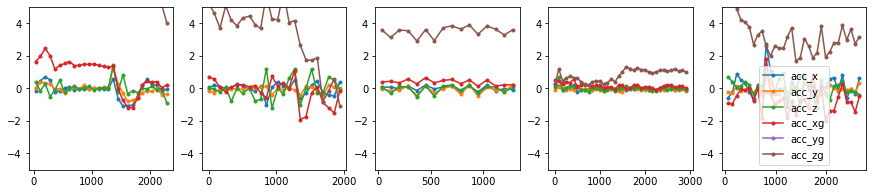

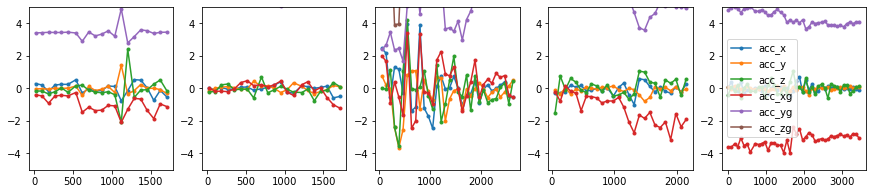

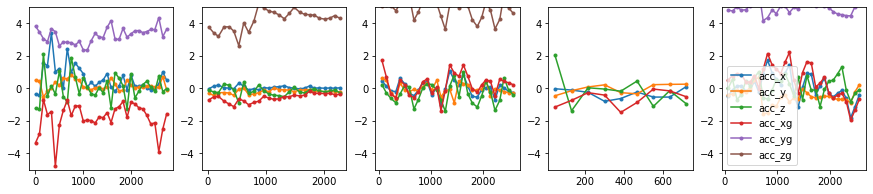

In [54]:
def beh_eda(id):
    tmp_big=train[train['behavior_id']==id]['fragment_id'].drop_duplicates().values
    plt.figure(figsize=(15,3))
    
    for j in range(5):
        tmp=train[train['fragment_id']==tmp_big[j]]
        plt.subplot(1,5,j+1)
        for i in ['acc_x','acc_y','acc_z','acc_xg','acc_yg','acc_zg']:
#         for i in ['acc_x','acc_y','acc_z']:
#         for i in ['acc_xg','acc_yg','acc_zg']:
            plt.plot(tmp.time_point,tmp[i],label=i,marker='.')
            plt.ylim(-5,5)
    plt.legend()
    plt.show()
beh_eda(16)
beh_eda(17)
beh_eda(18)